In [107]:
import pandas as pd
import numpy as np

In [108]:
df=pd.read_csv('smoke_detection_iot.csv')
df.head()

Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           0

In [109]:
df=df.drop(['Unnamed: 0','UTC','CNT'],axis=1)

In [110]:
df.shape

(62630, 13)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [112]:
#checking the distribution of target column:
print(df['Fire Alarm'].value_counts())
print(" ")
print(df['Fire Alarm'].value_counts(normalize=True)*100)

Fire Alarm
1    44757
0    17873
Name: count, dtype: int64
 
Fire Alarm
1    71.462558
0    28.537442
Name: proportion, dtype: float64


In [113]:
#split the data
from sklearn.model_selection import train_test_split

#seperate x and y variables
X=df.drop('Fire Alarm',axis=1)
y=df['Fire Alarm']

#Divide data into train/test set
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8, random_state=0)

In [114]:
X_train.shape, X_test.shape

((50104, 12), (12526, 12))

In [115]:
X_train.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
dtype: int64

In [116]:
X_train.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
dtype: int64

In [117]:
#checking duplicates
duplicates= X_train.duplicated()

print("Number of duplicates:", duplicates.sum())

Number of duplicates: 2


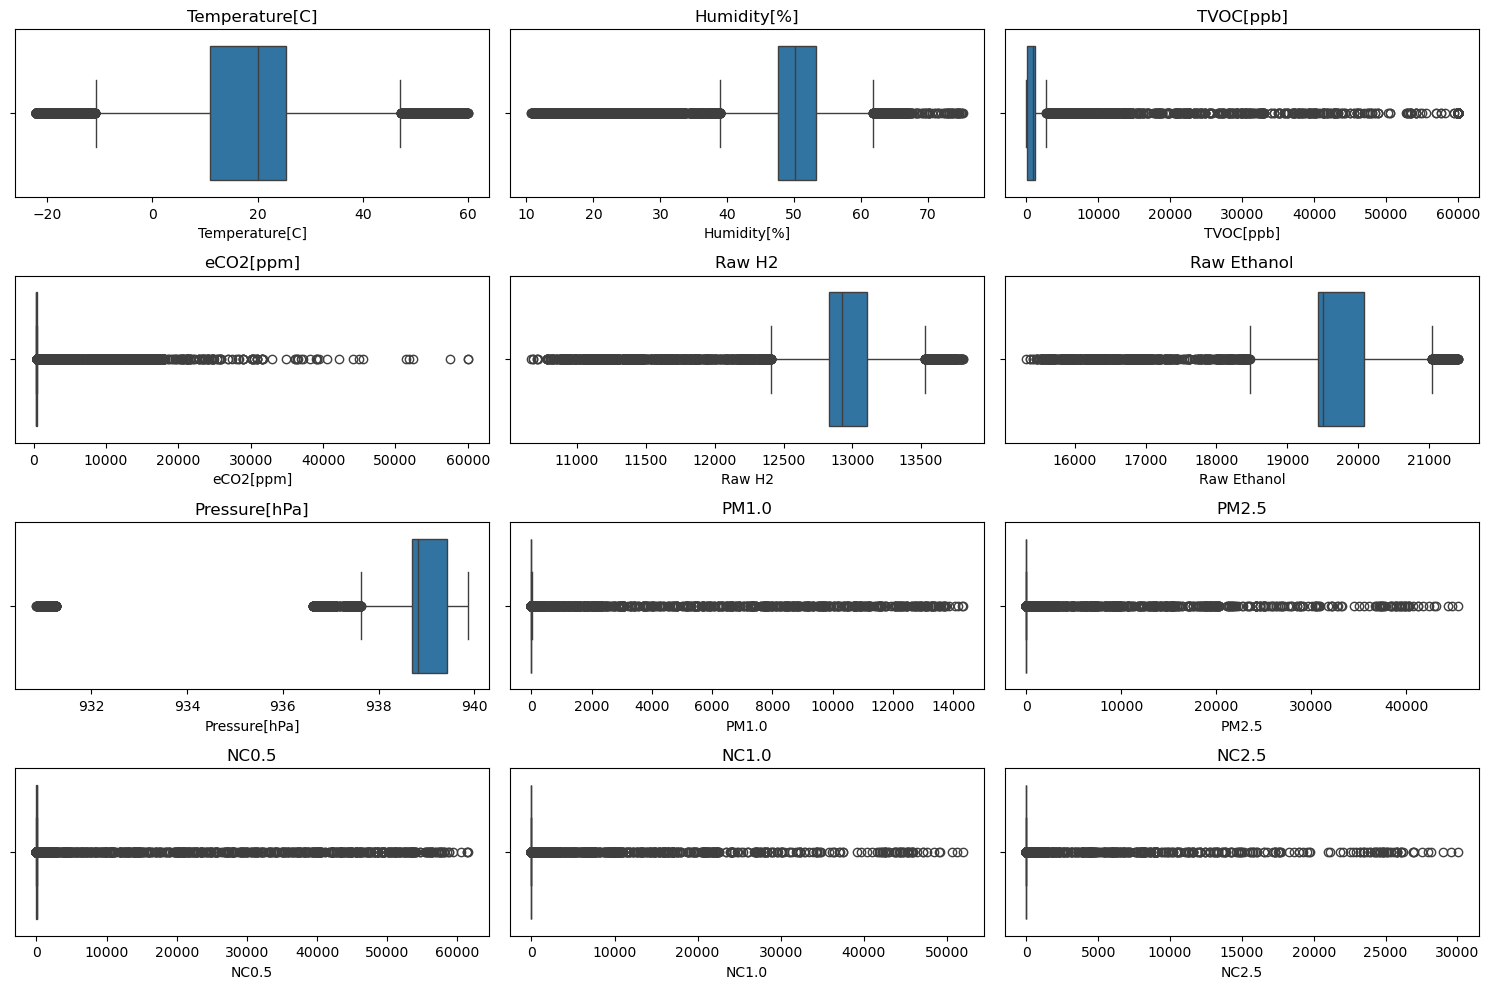

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

#setting the figure size
plt.figure(figsize=(15,10))

#creating a list containing all independednt features
feature_list=X_train.columns

#running a loop to create boxplots
for i in range(len(X_train.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x= feature_list[i], data= X_train)
    plt.title(feature_list[i])
    plt.tight_layout()

## Outlier treatment

# np.clip
is a numpy function that limits the values in an array to be within a specified range. It takes three arguements; an array, a minimum value, and a maximum value. For each element in the array, if the value is less than the minimum, it is set to the minimum, if it is greater than the maximum, it is set to the maximum. If the value is within the specified range, it remains unchanged.

In [121]:
#Q1,Q3, and IQR
Q1=X_train.quantile(0.25)
Q3=X_train.quantile(0.75)
IQR=Q3-Q1

#Define a function to handle outliers using np.clip
def treat_outliers(dataframe, column):
    lower_bound= Q1[column] - 1.5*IQR[column]
    upper_bound= Q3[column] + 1.5*IQR[column]

    #replace values outside the bounds with the respective bounds
    dataframe[column]=np.clip(dataframe[column], lower_bound, upper_bound) #if given value below the lower_bound -> will bring to lower bound and vide versa

#Apply the treatment to each numerical feature in X_train
for col in X_train.columns:
    treat_outliers(X_train, col)

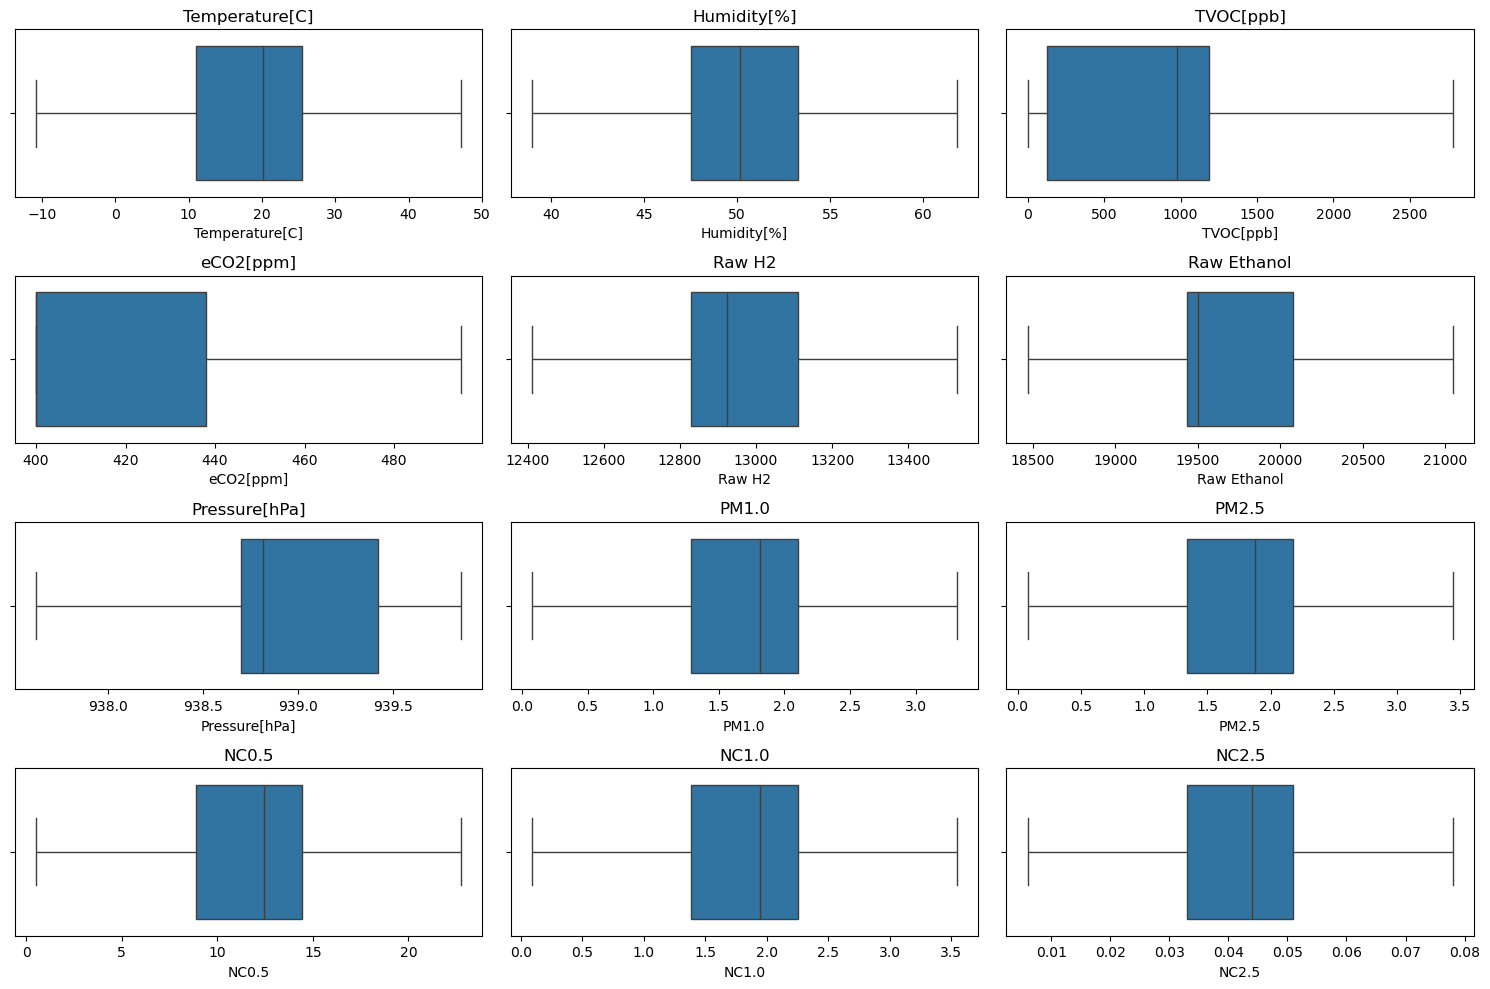

In [122]:
#setting the figure size
plt.figure(figsize=(15,10))

#creating a list containing all independednt features
feature_list=X_train.columns

#running a loop to create boxplots
for i in range(len(X_train.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x= feature_list[i], data= X_train)
    plt.title(feature_list[i])
    plt.tight_layout()

In [123]:
#outlier treatment for test data
for col in X_test.columns:
    treat_outliers(X_test, col)
#note: we have used the treat_outliers function defined earlier

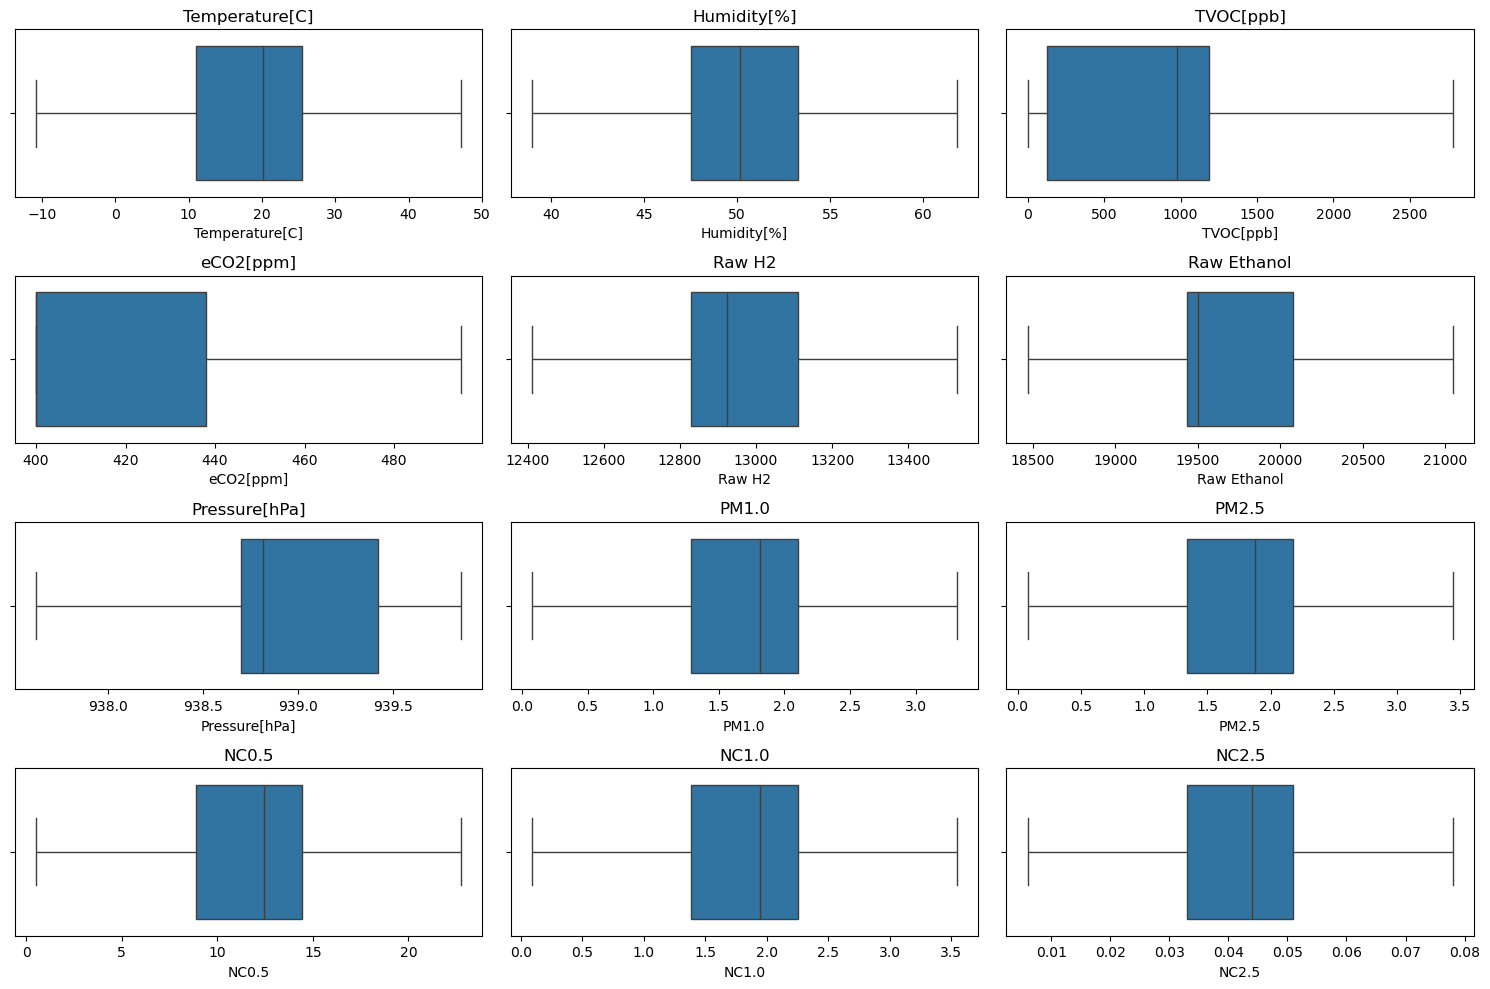

In [124]:
#setting the figure size
plt.figure(figsize=(15,10))

#creating a list containing all independednt features
feature_list=X_test.columns

#running a loop to create boxplots
for i in range(len(X_test.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x= feature_list[i], data= X_train)
    plt.title(feature_list[i])
    plt.tight_layout()

## Checking if the independent features are correlated

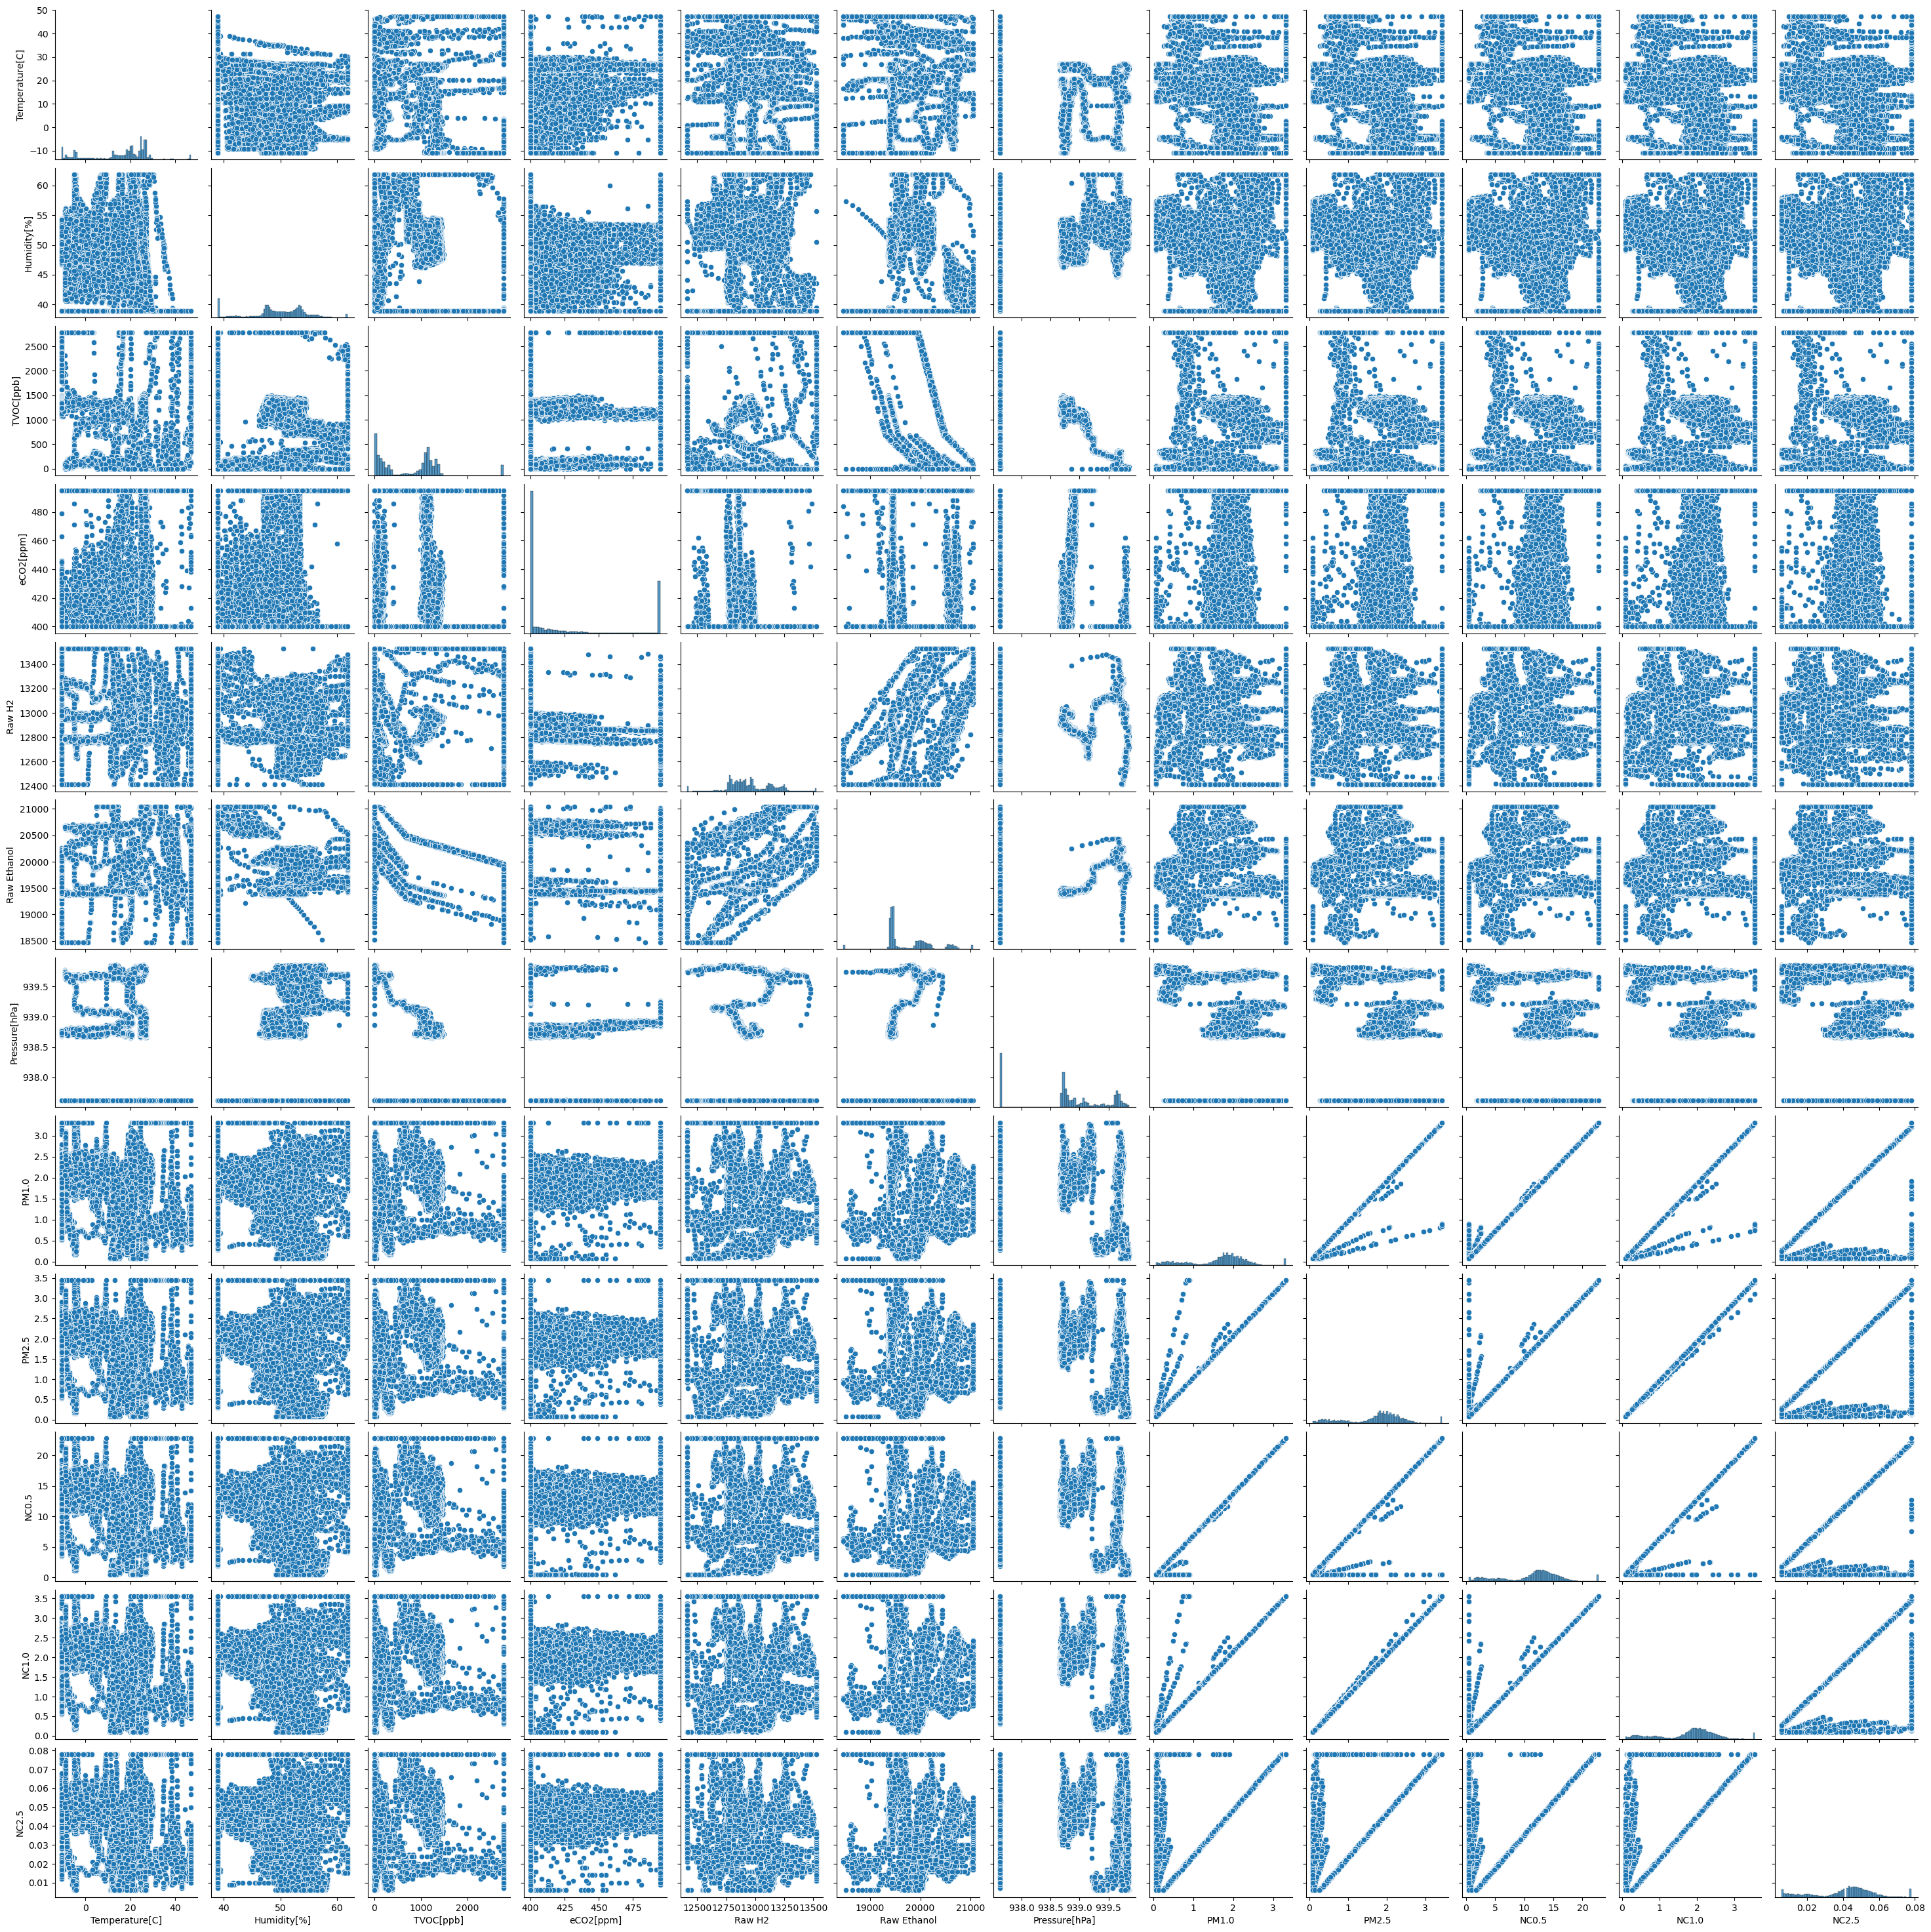

In [126]:
sns.pairplot(X_train); #to check if variables have linear association; if then only makes sense

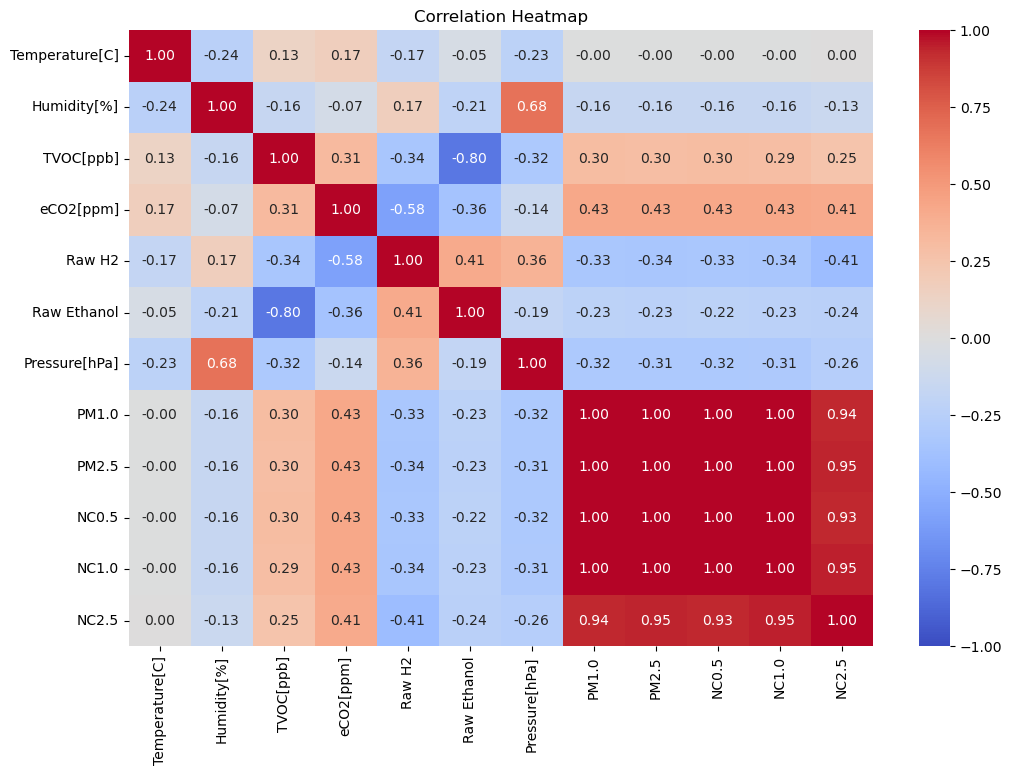

In [127]:
#visualize correlations between numerical features
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [128]:
#logistic reg is sensitive to correlations, so we will have to treat multicolinearity-> apply variance inflation
# >5, is consider alarming, cannot drop all at once, but once at a time
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Feature']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

#Display VIF values
print('VIF Values:')
print(vif.sort_values(by='VIF',ascending=False))

VIF Values:
           Feature            VIF
7            PM1.0  257172.447474
8            PM2.5  187567.275769
9            NC0.5  149950.399712
10           NC1.0  149470.776507
6    Pressure[hPa]   15336.370814
4           Raw H2    9178.930018
5      Raw Ethanol    7648.296824
3        eCO2[ppm]     229.562421
1      Humidity[%]     186.140433
11           NC2.5      86.022898
2        TVOC[ppb]       9.678514
0   Temperature[C]       2.752025


In [129]:
#set a threshold for maximum allowable VIF
max_vif=5

#initialize a list to store removed variables
removed_variables=[]

#initialize a flag to check if there are any variables exceeding the threshold
remove_flag= True

while remove_flag:
    vif=pd.DataFrame()
    vif['Feature']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    #find the variable with the highest VIF
    max_vif_feature= vif.loc[vif['VIF'].idxmax()]

    if max_vif_feature['VIF']>max_vif:
        #Remove the variable with the highest VIF from X_train
        removed_variable= max_vif_feature['Feature']
        X_train= X_train.drop(removed_variable, axis=1)
        removed_variables.append(removed_variable)
        print(f"Removed variable with high VIF: {removed_variable} (VIF={max_vif_feature['VIF']})")
    else:
        # if <5, set flag to false to exit the loop
        remove_flag=False

print('Final variables after VIF removal:', X_train.columns)

Removed variable with high VIF: PM1.0 (VIF=257172.44747385362)
Removed variable with high VIF: PM2.5 (VIF=169757.9182993816)
Removed variable with high VIF: Pressure[hPa] (VIF=15269.023145745043)
Removed variable with high VIF: Raw H2 (VIF=5736.009497019478)
Removed variable with high VIF: NC1.0 (VIF=963.7812404247682)
Removed variable with high VIF: Raw Ethanol (VIF=190.29085594025304)
Removed variable with high VIF: eCO2[ppm] (VIF=92.37174125745975)
Removed variable with high VIF: NC2.5 (VIF=52.652779028008915)
Removed variable with high VIF: Humidity[%] (VIF=6.57868111536111)
Final variables after VIF removal: Index(['Temperature[C]', 'TVOC[ppb]', 'NC0.5'], dtype='object')


In [130]:
#drop corresponding columns from X_test
X_test= X_test.drop(columns=removed_variables, errors='ignore')

In [131]:
X_train.shape

(50104, 3)

In [132]:
X_test.shape

(12526, 3)

# Standard scaling

In [168]:
from sklearn.preprocessing import StandardScaler

#Initialize the standardscaler
scaler= StandardScaler()

#Fit and transform on X_train
X_train_scaled= pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns) #fit- calculates the mean and std, transforms applies that x minus mu by sigma transformation on the data
#scaler usually returns data in array, hence we put them in DataFrame
#Transform X_test using the same scaler
X_test_scaled= pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

# Model building

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#Initialize Logistic Regression model
logistic_model= LogisticRegression(random_state=123)

#Train the model on the scaled training data
logistic_model.fit(X_train_scaled, y_train)

#Make predictions on the scaled training data
y_train_pred= logistic_model.predict(X_train_scaled)

#Make predictions on the scaled testing data
y_test_pred= logistic_model.predict(X_test_scaled)

#Evaluate confusion matrix for training data
conf_matrix_train= confusion_matrix(y_train,y_train_pred)

#Evaluate confuson matrix for testing data
conf_matrix_test= confusion_matrix(y_test, y_test_pred)

Text(518.4494949494949, 0.5, 'Actual')

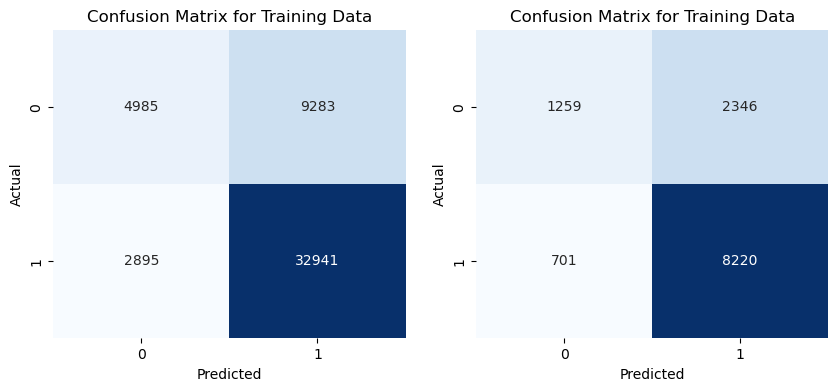

In [173]:
#visualize confusion matrices
plt.figure(figsize=(10,4))

#training data
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#test data
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [175]:
'''
false negative-recall
false positives- precision
'''

'\nfalse negative-recall\nfalse positives- precision\n'

In [179]:
class_report_train= classification_report(y_train, y_train_pred)
print("Classification Report for Training Data:\n", class_report_train)

class_report_test= classification_report(y_test, y_test_pred)
print("Classification Report for Training Data:\n", class_report_test)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.63      0.35      0.45     14268
           1       0.78      0.92      0.84     35836

    accuracy                           0.76     50104
   macro avg       0.71      0.63      0.65     50104
weighted avg       0.74      0.76      0.73     50104

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.64      0.35      0.45      3605
           1       0.78      0.92      0.84      8921

    accuracy                           0.76     12526
   macro avg       0.71      0.64      0.65     12526
weighted avg       0.74      0.76      0.73     12526



In [ ]:
'''
0.92 of recall 1- in 100 cases, 92 were proper fire alarm triggered 
0.78- out of 100, it was 78
0.35- no fire incident, only 35 were correctly indentified, 65 were wrongly indetified
'''

In [181]:
logistic_model.coef_

array([[-0.56570409,  0.60830431,  0.44028531]])

In [183]:
logistic_model.intercept_

array([1.09761029])